# Simple example script to illustrate fit/predict ML pipeline of scikit-learn

In [12]:
# Uncomment to upgrade packages
#!pip3 install pandas --upgrade --user --quiet 
#!pip3 install numpy --upgrade --user --quiet 
#!pip3 install scikit-learn --upgrade --user --quiet

In [13]:
import numpy as np
from sklearn.metrics import mean_squared_error  
import pandas as pd

pd.set_option('display.precision', 2)

## 1. Load `murders.txt` data from class

In [14]:
df = pd.read_csv('murders.txt', sep=' ')
print(df)

    inhabitants  poverty  unemployment  murders
0           587     16.5           6.2     11.2
1           643     20.5           6.4     13.4
2           635     26.3           9.3     40.7
3           692     16.5           5.3      5.3
4          1248     19.2           7.3     24.8
5           643     16.5           5.9     12.7
6          1964     20.2           6.4     20.9
7          1531     21.3           7.6     35.7
8           713     17.2           4.9      8.7
9           749     14.3           6.4      9.6
10         7895     18.1           6.0     14.5
11          762     23.1           7.4     26.9
12         2793     19.1           5.8     15.7
13          741     24.7           8.6     36.2
14          625     18.6           6.5     18.1
15          854     24.9           8.3     28.9
16          716     17.9           6.7     14.9
17          921     22.4           8.6     25.8
18          595     20.2           8.4     21.7
19         3353     16.9           6.7  

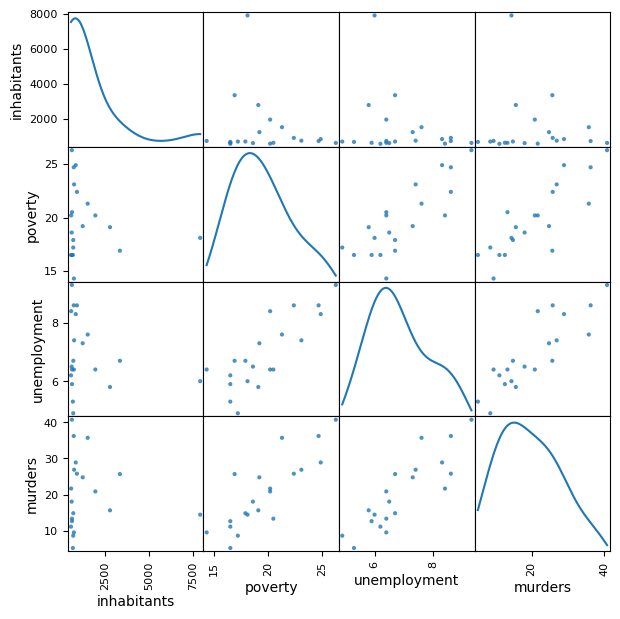

In [15]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, alpha=0.8, figsize=(7, 7), diagonal='kde') ;

In [16]:
# put data into X matrix and y column

X = df[['inhabitants', 'poverty', 'unemployment']].to_numpy()
y = df[['murders']].to_numpy()

print(X.shape, y.shape)

(20, 3) (20, 1)


## 2. Train/test split for later validation

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(13, 3) (13, 1)
(7, 3) (7, 1)


## 3. Train linear model to predict `murders` 

The `LinearRegression` model from scikit-learn uses the _least squares_ method explained in class to find linear coefficients $\theta_0, \theta_1, ..$, remember:

$$\theta_{lsm} = (X^T X)^{-1} X^T y$$

### train model

In [18]:
from sklearn.linear_model import LinearRegression

# instantiate model's object
model1 = LinearRegression()

# train model's object with X,y data  (basically this is doing what the formula above shows)
model1.fit(X_train, y_train)   

# coefficients (the _thetas_ are stored in these locations of the model; intercept is separate from rest)
print(model1.coef_, model1.intercept_)

[[3.35934075e-03 6.64370936e-01 7.36166070e+00]] [-46.59017893]


### show predictions + errors on training data points

In [19]:
# extract learned coefficients 
theta_vector = np.array(model1.coef_[0]).reshape((3,1))
bias = model1.intercept_[0]

# make predictions for training points
y_pred = model1.predict(X_train)   # basically doing: y_pred = X_train @ theta_vector + bias
y_pred_sanity_check = X_train @ theta_vector + bias  # sanity check, make sure they're the same in table below

# compute squared error for each example
abs_error = np.abs(y_pred - y_train)
sq_error = np.square(y_pred - y_train)

# print training data with predictions
dict_data = {'poverty': X_train[:,1].ravel(), 'target': y_train.ravel(), 'pred(sklearn)': y_pred.ravel(), 'pred(formula)': y_pred_sanity_check.ravel(), 'abs_error': abs_error.ravel(), 'squared_error': sq_error.ravel()}
print(pd.DataFrame.from_dict(dict_data))

# show _mean squared error_
print(f'\nThe training mean squared error is: {mean_squared_error(y_pred, y_train)}')

    poverty  target  pred(sklearn)  pred(formula)  abs_error  squared_error
0      24.7    36.2          35.62          35.62       0.58           0.34
1      19.2    24.8          24.10          24.10       0.70           0.49
2      26.3    40.7          41.48          41.48       0.78           0.61
3      16.5    12.7           9.97           9.97       2.73           7.48
4      18.6    18.1          15.72          15.72       2.38           5.68
5      14.3     9.6          12.54          12.54       2.94           8.65
6      21.3    35.7          28.65          28.65       7.05          49.66
7      17.9    14.9          17.03          17.03       2.13           4.54
8      23.1    26.9          25.79          25.79       1.11           1.23
9      16.5     5.3           5.71           5.71       0.41           0.17
10     16.5    11.2          11.99          11.99       0.79           0.62
11     24.9    28.9          33.92          33.92       5.02          25.23
12     19.1 

## 4. Test trained linear model to predict `murders` on __unseen data__  (test partition)

In [20]:
# make predictions on unseen test points (from test partition)
y_pred = model1.predict(X_test) # basically doing: y_pred = X_test @ theta_vector + bias

# compute squared error for each example
abs_error = np.abs(y_pred - y_test)
sq_error = np.square(y_pred - y_test)

# show them in table
dict_data = {'poverty': X_test[:,1].ravel(), 'target': y_test.ravel(), 'pred': y_pred.ravel(), 'abs_error': abs_error.ravel(), 'squared_error': sq_error.ravel()}
print(pd.DataFrame.from_dict(dict_data))

print(f'\nThe TEST mean squared error is: {mean_squared_error(y_pred, y_test)}')

   poverty  target   pred  abs_error  squared_error
0     20.2    21.7  30.67       8.97          80.40
1     20.5    13.4  16.30       2.90           8.43
2     16.9    25.7  25.22       0.48           0.23
3     17.2     8.7   3.30       5.40          29.11
4     18.1    14.5  36.13      21.63         467.72
5     22.4    25.8  34.70       8.90          79.14
6     20.2    20.9  20.54       0.36           0.13

The TEST mean squared error is: 95.02374052387435


## 5. `vander` polinomial expansion for next script..

In the next script we are going to see how to expand the input dataset using polynomial features from original data.
Here we show in a simple manner how to do this with [numpy's vander](https://numpy.org/doc/stable/reference/generated/numpy.vander.html) function,
which just computes $[x^0, x^1, x^2, ..]$ from feature $x$.

In [21]:
x = np.array([1, 2, 3, 5])
deg = 3
np.vander(x, deg+1, increasing=True)

array([[  1,   1,   1,   1],
       [  1,   2,   4,   8],
       [  1,   3,   9,  27],
       [  1,   5,  25, 125]])